In [2]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler


In [3]:
#Loading data
df=pd.read_csv("C:/Users/91861/Desktop/tested.csv")
print(df)

#Encoding Gender column to int or floats
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])

#Filling null values in the Age column
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Age']

#And dropping left over columns
df=df.dropna()

     PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...

In [4]:
#We Took only columns like Passenger class,Gender,fare and Age and left the other columns because they are the independent varibales
x1=df.drop(['PassengerId','Survived','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1)

#Only taking values of independent variables
x=x1.values
x.shape
x

array([[  1.        ,   0.        ,  23.        ,  82.2667    ],
       [  1.        ,   0.        ,  47.        ,  61.175     ],
       [  1.        ,   0.        ,  48.        , 262.375     ],
       [  1.        ,   0.        ,  22.        ,  61.9792    ],
       [  1.        ,   1.        ,  41.        ,  30.5       ],
       [  1.        ,   1.        ,  30.        ,  57.75      ],
       [  1.        ,   1.        ,  30.27259036,  26.55      ],
       [  1.        ,   0.        ,  45.        ,  52.5542    ],
       [  1.        ,   1.        ,  45.        ,  29.7       ],
       [  1.        ,   0.        ,  60.        ,  76.2917    ],
       [  1.        ,   1.        ,  24.        ,  60.        ],
       [  1.        ,   0.        ,  28.        , 263.        ],
       [  3.        ,   1.        ,  25.        ,   7.65      ],
       [  1.        ,   0.        ,  36.        , 262.375     ],
       [  1.        ,   1.        ,  13.        , 262.375     ],
       [  1.        ,   1

In [8]:
#We want to predict the survival chance of passenger so i decided to store dependent variable column to y 
y=df['Survived'].values
y.shape
y

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [10]:
#Splitting data into traing and testing set effectively

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,y_train.shape

((72, 4), (72,))

In [12]:
#Transforming train and test set of independent variables
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)

In [14]:
#Using Random Forest classifier to predict the result
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [16]:
#making predictions on test set
y_pred=RFC.predict(x_test)

In [18]:
#validating pred using metrics
from sklearn.metrics import r2_score,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
r2,mse

(1.0, 0.0)

In [20]:
#Checking th eaccuray using metrics

from sklearn.metrics import confusion_matrix , accuracy_score
RF_acc= accuracy_score(y_test,y_pred)
print(RF_acc*100,'%'," Accuracy")

100.0 %  Accuracy


In [24]:
#Checking model performance on Outer data
result=RFC.predict(sc.transform([[ 1.        ,   1.        ,  41.        ,  30.5   ]]))
if result>=1:
    print("person dead")
else:
    print("Person survived")
result

Person survived


array([0], dtype=int64)

In [26]:
#Checking model performance on Outer data
result=RFC.predict(sc.transform([[  1.        ,   0.        ,  23.        ,  82.2667 ]]))
if result>=1:
    print("person dead")
else:
    print("Person survived")
result

person dead


array([1], dtype=int64)

In [46]:
result=RFC.predict(sc.transform([[1.,0,25,90]]))
if result>=1:
    print("person dead")
else:
    print("Person survived")
result

person dead


array([1], dtype=int64)

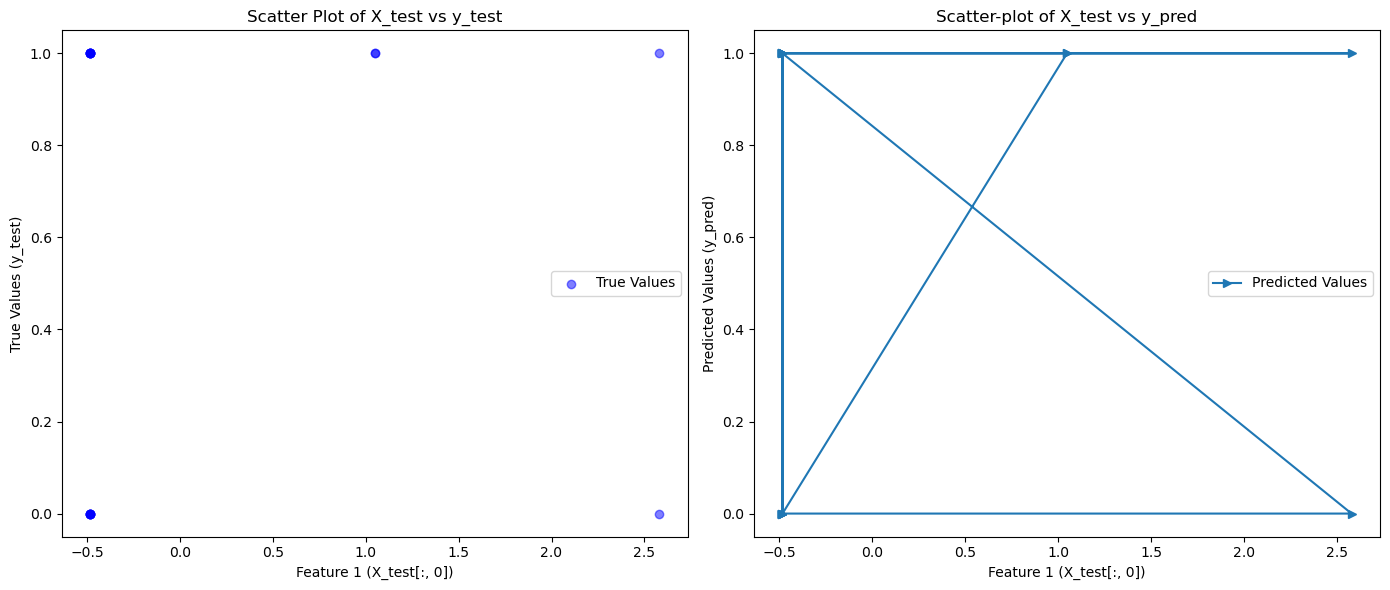

In [81]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))

# Scatter Plot of X_test vs. y_test
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], y_test, c='blue', label='True Values', alpha=0.5)
plt.title('Scatter Plot of X_test vs y_test')
plt.xlabel('Feature 1 (X_test[:, 0])')
plt.ylabel('True Values (y_test)')
plt.legend()

# Line Plot of X_test vs. y_pred
plt.subplot(1, 2, 2)
plt.plot(X_test[:, 0], y_pred,'->', label='Predicted Values')
plt.title('Scatter-plot of X_test vs y_pred')
plt.xlabel('Feature 1 (X_test[:, 0])')
plt.ylabel('Predicted Values (y_pred)')
plt.legend()

plt.tight_layout()
plt.show()

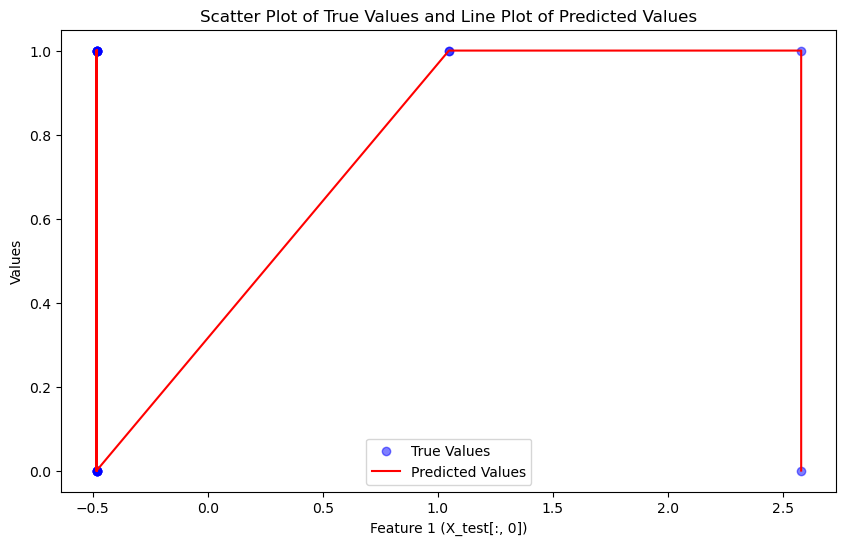

In [87]:
# Plotting
import numpy as np
plt.figure(figsize=(10, 6))

# Scatter Plot of X_test vs. y_test
plt.scatter(X_test[:, 0], y_test, color='blue', label='True Values', alpha=0.5)

# Line Plot of X_test vs. y_pred
# Sorting X_test and predictions for line plot
sorted_indices = np.argsort(X_test[:, 0])
plt.plot(X_test[sorted_indices, 0], y_pred[sorted_indices], color='red', label='Predicted Values')

# Adding labels and title
plt.title('Scatter Plot of True Values and Line Plot of Predicted Values')
plt.xlabel('Feature 1 (X_test[:, 0])')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.show()